In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d kuzivakwashe/significant-asl-sign-language-alphabet-dataset

In [ ]:
!unzip /content/significant-asl-sign-language-alphabet-dataset.zip

In [ ]:
!pip install mediapipe

In [ ]:
# Convert the image to RGB (MediaPipe requires RGB input)
import cv2
import mediapipe as mp
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize MediaPipe Drawing module
mp_drawing = mp.solutions.drawing_utils

# Run hand landmark detection
results = hands.process(image_rgb)
x_ = []
y_ = []
data_aux = []
# Check if landmarks are detected
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
          x_.append(hand_landmarks.landmark[i].x)
          y_.append(hand_landmarks.landmark[i].y)
        for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    print(f"{x}\n{y}")
                    data_aux.append(x)
                    data_aux.append(y)
# Draw landmarks on the image
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
            # Extract normalized coordinates
            x = data_aux[i]
            y = data_aux[i]

            # Convert normalized coordinates back to image coordinates
            x_image = int(x * image.shape[1])
            y_image = int(y * image.shape[0])

            # Draw a circle at each landmark position
            cv2.circle(image, (x_image, y_image), 5, (0, 255, 0), -1)

# Display the image
from google.colab.patches import cv2_imshow
cv2_imshow(image)

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
files.upload()

Saving data (1).pickle to data (1).pickle


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

data_dict = pickle.load(open('./data (1).pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)


<ipython-input-158-6a410575868b>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data_dict['data'])


In [ ]:
for i in range(len(x_train)):
  x_train[i] = np.asarray(x_train[i])

In [ ]:
for i in range(len(x_train)):
  if len(x_train[i]) < 42:
    del x_train

In [ ]:
for i in range(len(x_train)):
  if len(x_train[i]) > 42:
    x_train[i] = x_train[i][42:]

In [ ]:
x_train = np.vstack(x_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the string labels to numerical labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, y_train_encoded is a numerical representation of your class labels
print(y_train_encoded)


[ 5 11  0 ... 16 19 14]


In [ ]:
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
for i in range(len(x_test)):
  x_test[i] = np.asarray(x_test[i])

In [ ]:
for i in range(len(x_test)):
  if len(x_test[i])>42:
    x_test[i] = x_test[i][42:]

In [ ]:
x_test = np.vstack(x_test)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_dist = {'n_estimators': randint(100, 1000),
              'max_depth': randint(1, 50),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 20)}

#Creating a random forest classifier object
#Creating a RandomizedSearchCV object


In [ ]:
#Fitting the RandomizedSearchCV object to the data
classifier= RandomForestClassifier()
#Fitting the data
classifier.fit(x_train, y_train_encoded)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
accuracy_score(y_test_encoded,y_pred)

0.9095833333333333

In [ ]:
from sklearn.svm import SVC
#Defining classifier for SVM
classifier = SVC(C=8.021969807540398,degree=1,gamma='scale',kernel='rbf')
classifier.fit(x_train,y_train_encoded)

SVC(C=8.021969807540398, degree=1)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
accuracy_score(y_test_encoded,y_pred)

0.9426388888888889

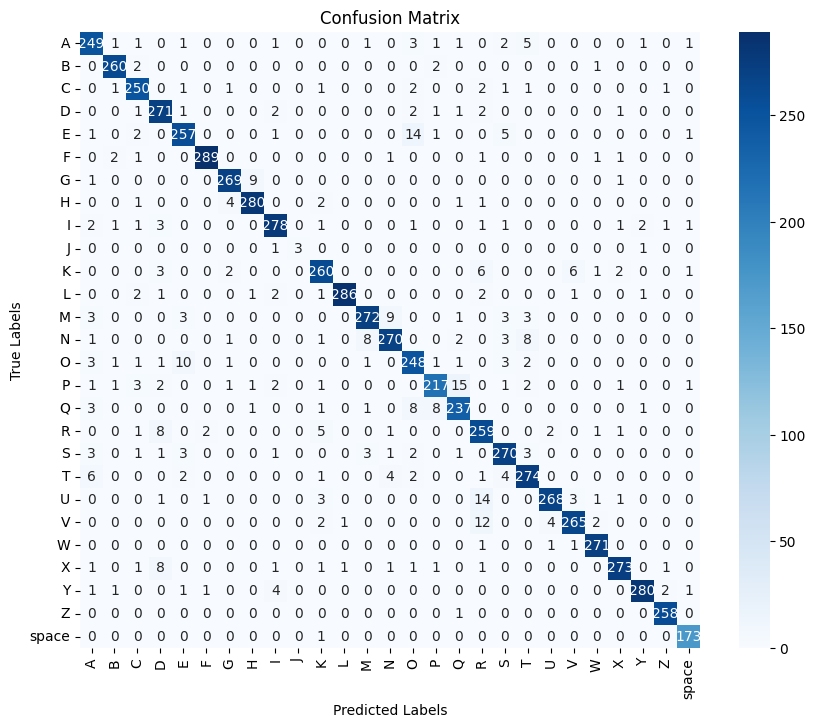

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_predict and y_test_encoded are arrays or lists
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Display the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
f = open('model1.p', 'wb')
pickle.dump({'model': classifier}, f)
f.close()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Classifier for KNN
classifier = KNeighborsClassifier(n_neighbors=1,p=2,weights='distance')
#Fitting data in KNN model
classifier.fit(x_train,y_train_encoded)
#Predicting data
y_pred = classifier.predict(x_test)

In [ ]:
accuracy_score(y_test_encoded,y_pred)

0.9141666666666667